In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error 

In [2]:
data=pd.read_csv(r'C:\Users\22anj\Desktop\train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data.shape

(1460, 81)

In [6]:
data1=pd.read_csv(r'C:\Users\22anj\Desktop\test.csv')

In [7]:
data1.shape

(1459, 80)

In [8]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
data.columns.str.lower()

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paveddrive

In [10]:
data1.columns.str.lower()

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paveddrive

In [11]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

In [12]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
data.corr()

C:\Users\22anj\AppData\Local\Temp\ipykernel_5448\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


C:\Users\22anj\AppData\Local\Temp\ipykernel_5448\1939813544.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

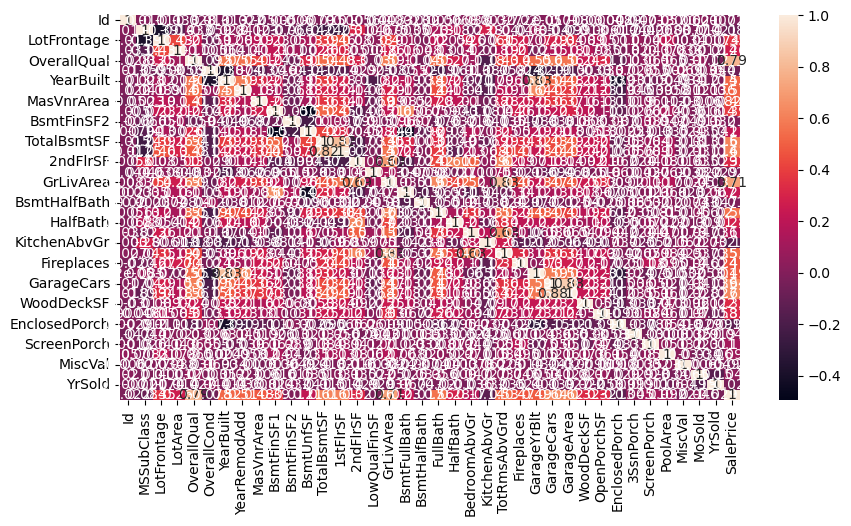

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)

In [15]:
#sns.pairplot(data)

In [16]:
plt.show()

In [17]:
x=data.drop(['SalePrice'],axis=1)

In [18]:
y=data['SalePrice']

In [19]:
x_train=x.select_dtypes(exclude=['object'])

In [20]:
x_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,500,349,0,0,0,0,0,0,2,2010
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,252,0,60,0,0,0,0,2500,5,2010
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,240,366,0,112,0,0,0,0,4,2010


In [21]:
value=x_train.isnull().sum()

In [22]:
print(value[value>0])

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


In [23]:
x_train['LotFrontage'].fillna(x_train['LotFrontage'].median(),inplace=True)
x_train['MasVnrArea'].fillna(x_train['MasVnrArea'].median(),inplace=True)
x_train['GarageYrBlt'].fillna(x_train['GarageYrBlt'].median(),inplace=True)

<Axes: >

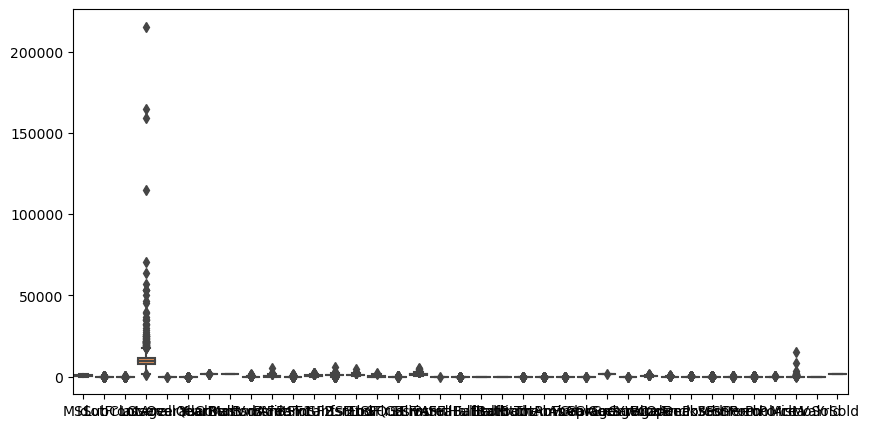

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(x_train)

In [25]:
x_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,500,349,0,0,0,0,0,0,2,2010
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,252,0,60,0,0,0,0,2500,5,2010
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,240,366,0,112,0,0,0,0,4,2010


In [26]:
xe=['GrLivArea','BedroomAbvGr','FullBath']
x_e=x_train[xe]
y=data['SalePrice']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x_e, y, test_size=0.33, random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler
col=x_train.columns

In [29]:
M=LinearRegression()
M.fit(X_train,y_train)

LinearRegression()

In [30]:
yp=M.predict(X_test)

In [31]:
ms_error=mean_squared_error(y_test,yp)
print('mse:',ms_error)

r2_S=r2_score(y_test,yp)
print('r2_Score:',r2_S)

mse: 2629660345.9775767
r2_Score: 0.6418035469280228


In [32]:
print("Coefficients:")
print(f"Intercept: {M.intercept_}")
for feature, coef in zip(x_e, M.coef_):
    print(f"{feature}: {coef}")

Coefficients:
Intercept: 55205.26482698441
GrLivArea: 99.66174487544716
BedroomAbvGr: -26295.768182125736
FullBath: 31335.023751875517


In [33]:
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_train=pd.DataFrame(x_train,columns=col)
x_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-1.730865,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-1.728492,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,-1.726120,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,-1.723747,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,-1.721374,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.357114,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.570750,-0.973018,...,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439
1456,1.723747,-0.872563,0.687385,0.266407,-0.071836,0.381743,0.222975,0.151865,0.087911,0.759659,...,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210
1457,1.726120,0.309859,-0.175462,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.570750,-0.369871,...,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210
1458,1.728492,-0.872563,-0.084636,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.570750,-0.865548,...,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210


In [34]:
from sklearn.feature_selection import mutual_info_regression

In [35]:
feature=mutual_info_regression(x_train,y)
rank = pd.DataFrame({'Feature': x_train.columns, 'MI Score':feature})
rank = rank.sort_values(by='MI Score',ascending=False) 

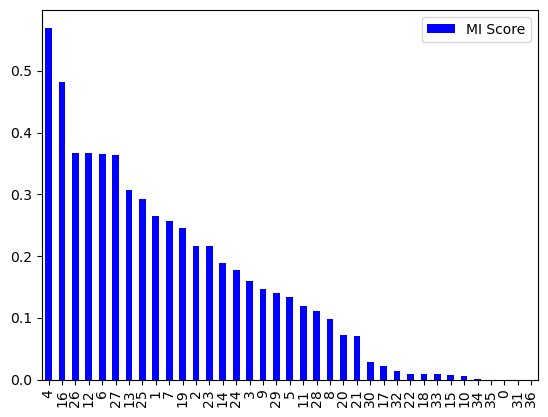

<Figure size 1000x800 with 0 Axes>

In [36]:


rank.plot(kind='bar',color='blue')
plt.figure(figsize=(10,8))
plt.show()

In [37]:
x_top=rank.head(5)['Feature'].tolist()

In [38]:
X=x_train[x_top]

In [39]:
X

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt
0,0.651479,0.370333,0.311725,-0.459303,1.050994
1,-0.071836,-0.482512,0.311725,0.466465,0.156734
2,0.651479,0.515013,0.311725,-0.313369,0.984752
3,0.651479,0.383659,1.650307,-0.687324,-1.863632
4,1.374795,1.299326,1.650307,0.199680,0.951632
...,...,...,...,...,...
1455,-0.071836,0.250402,0.311725,-0.238122,0.918511
1456,-0.071836,1.061367,0.311725,1.104925,0.222975
1457,0.651479,1.569647,-1.026858,0.215641,-1.002492
1458,-0.795151,-0.832788,-1.026858,0.046905,-0.704406


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
model1=LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [42]:
y_pred1=model1.predict(X_test)

In [43]:
mse1=mean_squared_error(y_test,y_pred1)
print('mse1:',mse1)

mse1: 1545340509.665659


In [44]:
r2_1=r2_score(y_test,y_pred1)
print('r2_1:',r2_1)

r2_1: 0.7895030473432098


In [45]:
print('features used:',x_top)

features used: ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']


In [46]:
print(f"Intercept: {model1.intercept_}")
for feature, coef in zip(x_top, model1.coef_):
    print(f"{feature}: {coef}")

Intercept: 179907.5923337251
OverallQual: 28733.52473266058
GrLivArea: 23367.952489345305
GarageCars: 12692.910863830331
TotalBsmtSF: 9795.578483033607
YearBuilt: 9361.816993894912


In [47]:
lasso=Lasso(alpha=0.1)
lasso.fit(x_train,y)
coefficient=lasso.coef_

In [48]:
feature1=x_train.columns[coefficient!=0]
X_1=pd.DataFrame(x_train,columns=x_train.columns)[feature1]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.33, random_state=42)

In [50]:
model1.fit(X_train,y_train)

LinearRegression()

In [51]:
y_pred2=model1.predict(X_test)

In [52]:
mse2=mean_squared_error(y_test,y_pred2)
print('mse2:',mse2)

r2_2=r2_score(y_test,y_pred2)
print('r2_2:',r2_2)

print('feature:',feature1.tolist())

print(f"Intercept: {model1.intercept_}")
for feature, coef in zip(X_1, model1.coef_):
    print(f"{feature}: {coef}")


mse2: 1578832552.7909908
r2_2: 0.7849409634710556
feature: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
Intercept: 179742.83001022495
Id: -1075.0090132053037
MSSubClass: -9129.37853709034
LotFrontage: -3026.7794408492055
LotArea: 4795.146480278493
OverallQual: 25259.038678807927
OverallCond: 3251.760881112369
YearBuilt: 7318.900011924013
YearRemodAdd: 4257.5765766856375
MasVnrArea: 4816.551800336487
BsmtFinSF1: 1.973682120223717e+16
BsmtFinSF2: 6980800200208169.0
BsmtUnfSF: 1.9120994511734384e+16
TotalBsmtSF: -1.89841806471057e+16
1

In [53]:
feat=['LotArea','YearBuilt','FullBath','GarageArea','BedroomAbvGr']
x3=x_train[feat]

In [54]:
x3

,LotArea,YearBuilt,FullBath,GarageArea,BedroomAbvGr
0,-0.207142,1.050994,0.789741,0.351000,0.163779
1,-0.091886,0.156734,0.789741,-0.060731,0.163779
2,0.073480,0.984752,0.789741,0.631726,0.163779
3,-0.096897,-1.863632,-1.026041,0.790804,0.163779
4,0.375148,0.951632,0.789741,1.698485,1.390023
...,...,...,...,...,...
1455,-0.260560,0.918511,0.789741,-0.060731,0.163779
1456,0.266407,0.222975,0.789741,0.126420,0.163779
1457,-0.147810,-1.002492,0.789741,-1.033914,1.390023
1458,-0.080160,-0.704406,-1.026041,-1.090059,-1.062465


In [55]:
X_train, X_test, y_train, y_test = train_test_split(x3, y, test_size=0.20, random_state=42)

In [56]:
mod=LinearRegression()

In [57]:
mod.fit(X_train,y_train)

LinearRegression()

In [58]:
y_pr=mod.predict(X_test)

In [59]:
mse3=mean_squared_error(y_test,y_pr)
print('mse3:',mse3)

r2_3=r2_score(y_test,y_pr)
print('r2_3:',r2_3)

print(f"Intercept: {mod.intercept_}")
for feature, coef in zip(x3, mod.coef_):
    print(f"{feature}: {coef}")


mse3: 3408766081.0569654
r2_3: 0.5555904678652469
Intercept: 180407.06877764268
LotArea: 11377.111742708286
YearBuilt: 16697.857350779817
FullBath: 20222.1839049834
GarageArea: 30026.979430587442
BedroomAbvGr: 3456.227849787482


In [60]:
sel_feat=['GrLivArea','BedroomAbvGr','FullBath']
x4=x_train[sel_feat]
y=data['SalePrice']

In [61]:
x4.isnull().sum()

GrLivArea       0
BedroomAbvGr    0
FullBath        0
dtype: int64

In [62]:
x4.head()

,GrLivArea,BedroomAbvGr,FullBath
0,0.370333,0.163779,0.789741
1,-0.482512,0.163779,0.789741
2,0.515013,0.163779,0.789741
3,0.383659,0.163779,-1.026041
4,1.299326,1.390023,0.789741


In [63]:
X_train, X_test, y_train, y_test = train_test_split(x4, y, test_size=0.33, random_state=42)

In [64]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pr4=model.predict(X_test)

In [65]:
mse4=mean_squared_error(y_test,y_pr4)
print('mse4:',mse4)

r2_4=r2_score(y_test,y_pr4)
print('r2_4:',r2_4)

print(f"Intercept: {model.intercept_}")
for feature, coef in zip(x4, model.coef_):
    print(f"{feature}: {coef}")


mse4: 2629660345.976844
r2_4: 0.6418035469281227
Intercept: 179905.28121199866
GrLivArea: 52352.35380620892
BedroomAbvGr: -21444.162670857426
FullBath: 17257.046733698535


In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
param_grid={'alpha':[0.01,0.1,1,10,100]}
grid=GridSearchCV(Lasso(),param_grid, cv=5,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [68]:
best=grid.best_estimator_

In [69]:
y_pr5=best.predict(X_test)

In [70]:
mse5=mean_squared_error(y_test,y_pr5)
print('mse5:',mse5)

r2_5=r2_score(y_test,y_pr5)
print('r2_5:',r2_5)

mse5: 2633280294.6814156
r2_5: 0.6413104593747192


In [71]:
ridge=Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
y_pr6=ridge.predict(X_test)

In [72]:
mse6=mean_squared_error(y_test,y_pr6)
print('mse6:',mse6)

r2_6=r2_score(y_test,y_pr6)
print('r2_6:',r2_6)

mse6: 2629842297.609526
r2_6: 0.6417787625754372
